In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from automap import AUTOMAP

## Learning curve

In [2]:
train_loss, test_loss = np.load('train_loss.npy'), np.load('test_loss.npy')

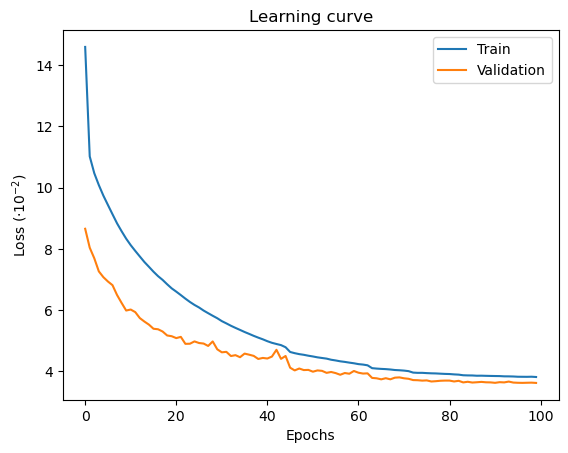

In [3]:
epochs = [_ for _ in range(100)]

plt.plot(epochs, train_loss * 1e2, label='Train')
plt.plot(epochs, test_loss * 1e2, label='Validation')
plt.xlabel('Epochs')
plt.ylabel(r'Loss $(\cdot 10^{-2})$')
plt.title('Learning curve')
plt.legend()
plt.show()

## Model avaliation

In [4]:
n = 128

automap = AUTOMAP(n)

In [5]:
model = torch.load('n128_b64_lr1e-5_L11e-4_brain_ma32_reducelrplateau_v1.pth', map_location=torch.device('cpu'))

automap.load_state_dict(model)

<All keys matched successfully>

In [6]:
x_test, y_test = np.load('test_sin_brain.npy'), np.load('test_im_brain.npy')

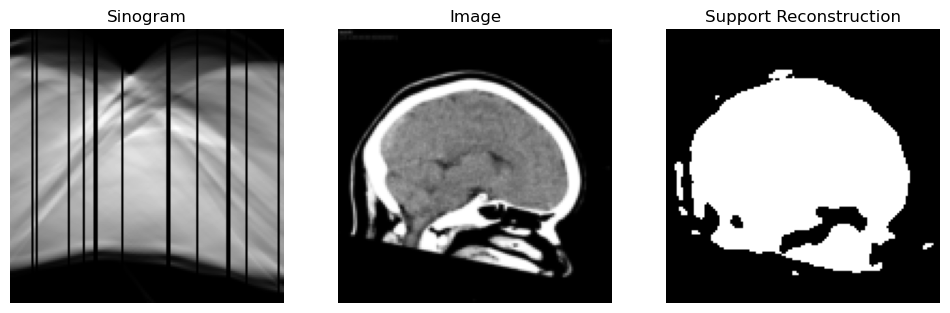

In [7]:
sin0, im0 = torch.tensor(x_test[0]), torch.tensor(y_test[0])

max_angles = 32

n_angles = torch.randint(0, max_angles, (1,)).item()
angles_idx = torch.randint(0, n, (n_angles,))
missing_angles = torch.ones(n, n)
missing_angles[:, angles_idx] = 0

sin0 *= missing_angles

with torch.no_grad():
    im_pred0 = automap(sin0.reshape(1, n, n))
    im_pred0 = im_pred0.reshape(n, n)
    im_pred0 = im_pred0 - im_pred0.mean()
    
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(sin0.reshape(n, n), 'gray')
ax[0].axis('off')
ax[0].set_title('Sinogram')

ax[1].imshow(im0.reshape(n, n), 'gray')
ax[1].axis('off')
ax[1].set_title('Image')

ax[2].imshow(im_pred0.reshape(n, n) > 0, 'gray')
ax[2].axis('off')
ax[2].set_title('Support Reconstruction')

plt.show()

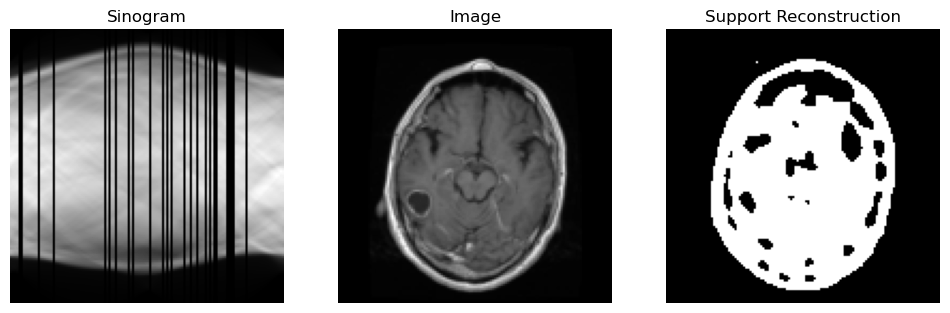

In [8]:
sin1, im1 = torch.tensor(x_test[1]), torch.tensor(y_test[1])

max_angles = 32

n_angles = torch.randint(0, max_angles, (1,)).item()
angles_idx = torch.randint(0, n, (n_angles,))
missing_angles = torch.ones(n, n)
missing_angles[:, angles_idx] = 0

sin1 *= missing_angles

with torch.no_grad():
    im_pred1 = automap(sin1.reshape(1, n, n))
    im_pred1 = im_pred1.reshape(n, n)
    im_pred1 = im_pred1 - im_pred1.mean()
    
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(sin1.reshape(n, n), 'gray')
ax[0].axis('off')
ax[0].set_title('Sinogram')

ax[1].imshow(im1.reshape(n, n), 'gray')
ax[1].axis('off')
ax[1].set_title('Image')

ax[2].imshow(im_pred1.reshape(n, n) > 0, 'gray')
ax[2].axis('off')
ax[2].set_title('Support Reconstruction')

plt.show()

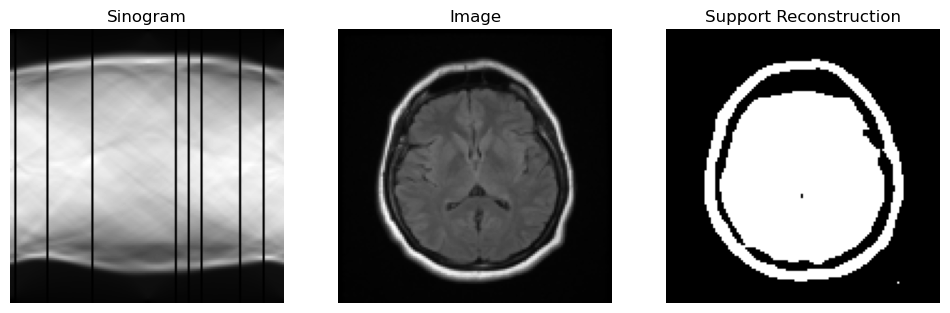

In [9]:
sin2, im2 = torch.tensor(x_test[2]), torch.tensor(y_test[2])

max_angles = 32

n_angles = torch.randint(0, max_angles, (1,)).item()
angles_idx = torch.randint(0, n, (n_angles,))
missing_angles = torch.ones(n, n)
missing_angles[:, angles_idx] = 0

sin2 *= missing_angles

with torch.no_grad():
    im_pred2 = automap(sin2.reshape(1, n, n))
    im_pred2 = im_pred2.reshape(n, n)
    im_pred2 = im_pred2 - im_pred2.mean()
    
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(sin2.reshape(n, n), 'gray')
ax[0].axis('off')
ax[0].set_title('Sinogram')

ax[1].imshow(im2.reshape(n, n), 'gray')
ax[1].axis('off')
ax[1].set_title('Image')

ax[2].imshow(im_pred2.reshape(n, n) > 0, 'gray')
ax[2].axis('off')
ax[2].set_title('Support Reconstruction')

plt.show()

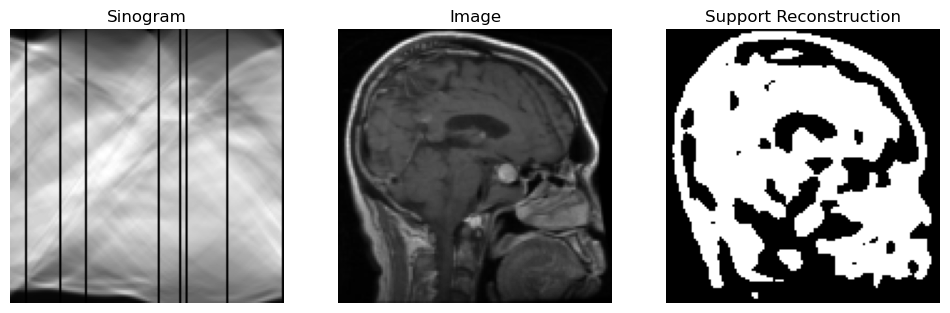

In [10]:
sin3, im3 = torch.tensor(x_test[3]), torch.tensor(y_test[3])

max_angles = 32

n_angles = torch.randint(0, max_angles, (1,)).item()
angles_idx = torch.randint(0, n, (n_angles,))
missing_angles = torch.ones(n, n)
missing_angles[:, angles_idx] = 0

sin3 *= missing_angles

with torch.no_grad():
    im_pred3 = automap(sin3.reshape(1, n, n))
    im_pred3 = im_pred3.reshape(n, n)
    im_pred3 = im_pred3 - im_pred3.mean()
    
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(sin3.reshape(n, n), 'gray')
ax[0].axis('off')
ax[0].set_title('Sinogram')

ax[1].imshow(im3.reshape(n, n), 'gray')
ax[1].axis('off')
ax[1].set_title('Image')

ax[2].imshow(im_pred3.reshape(n, n) > 0, 'gray')
ax[2].axis('off')
ax[2].set_title('Support Reconstruction')

plt.show()

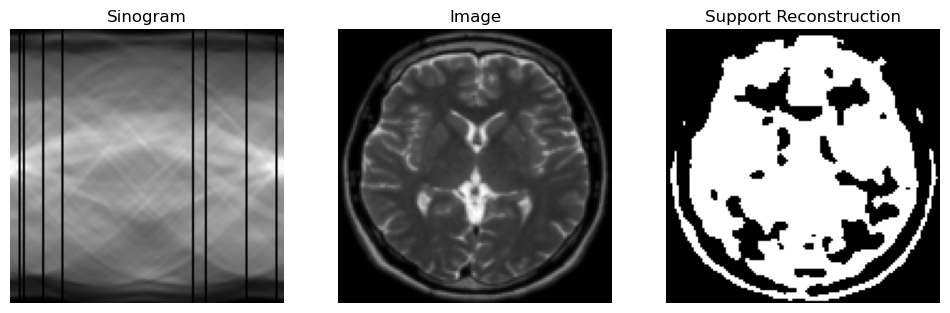

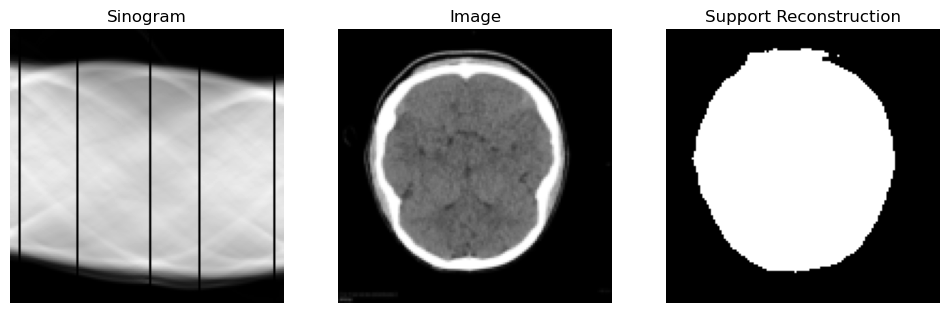

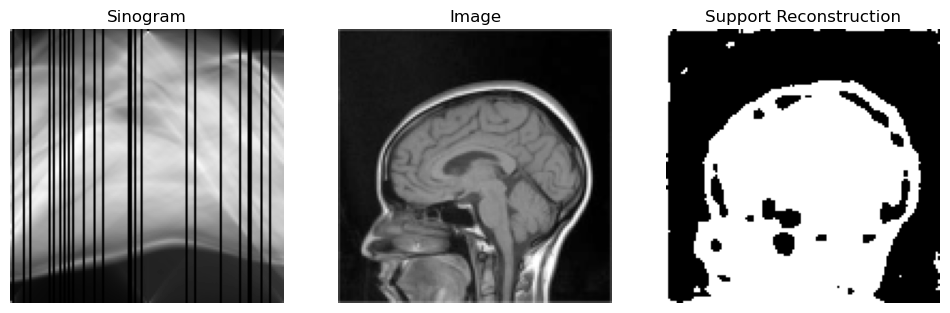

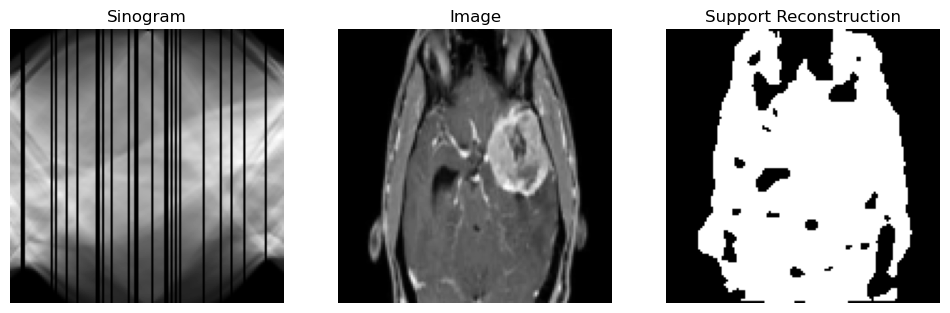

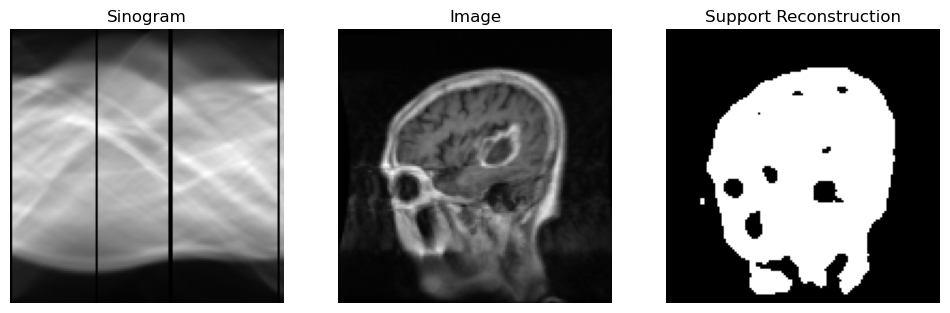

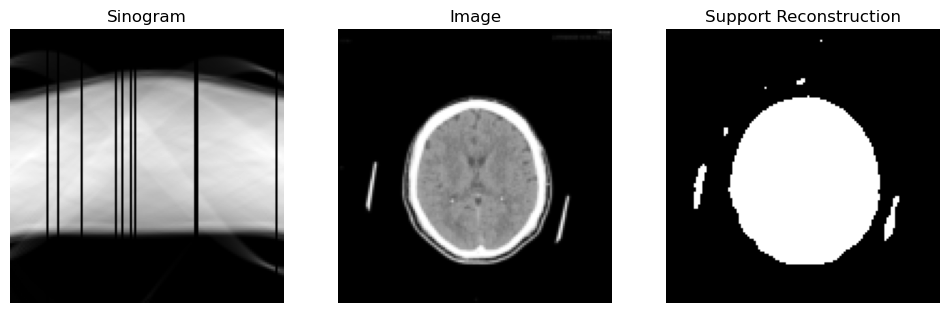

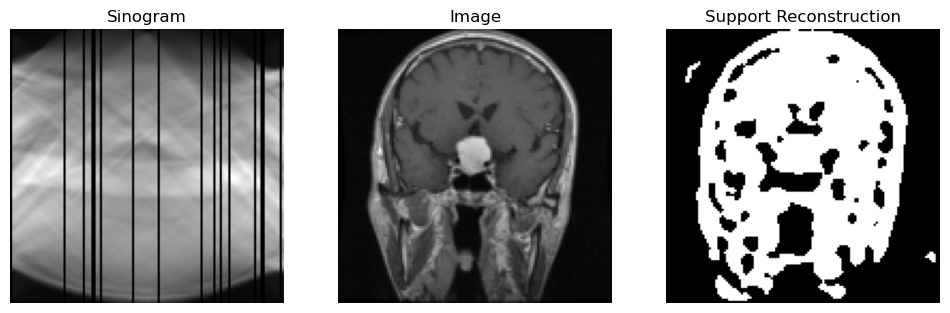

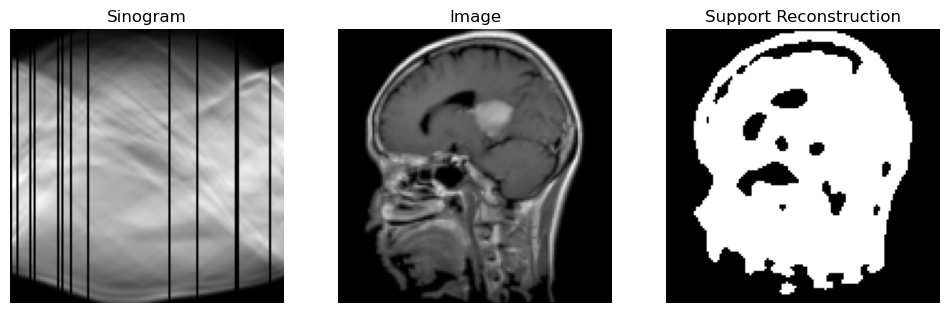

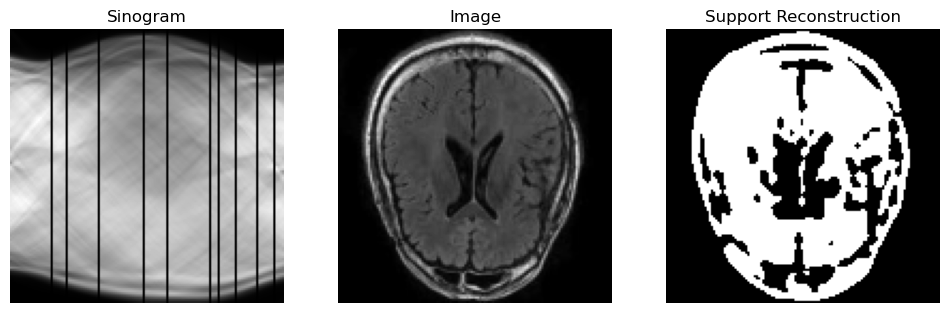

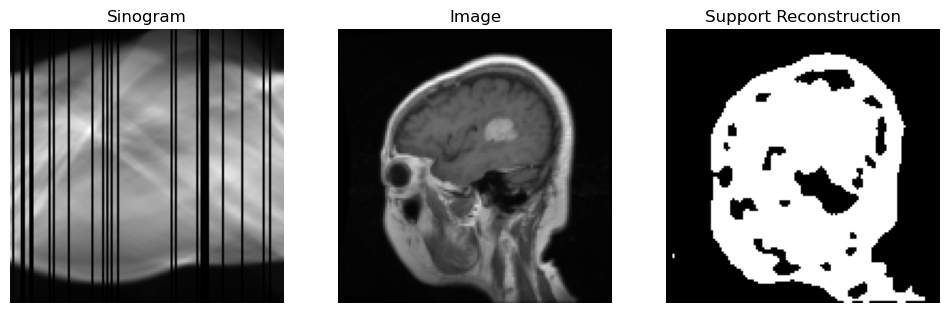

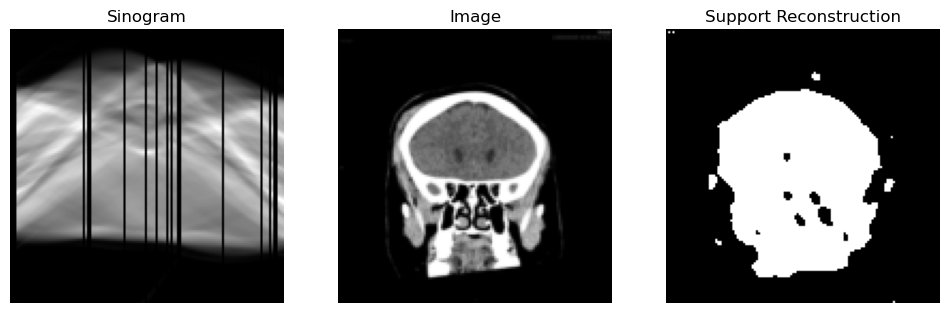

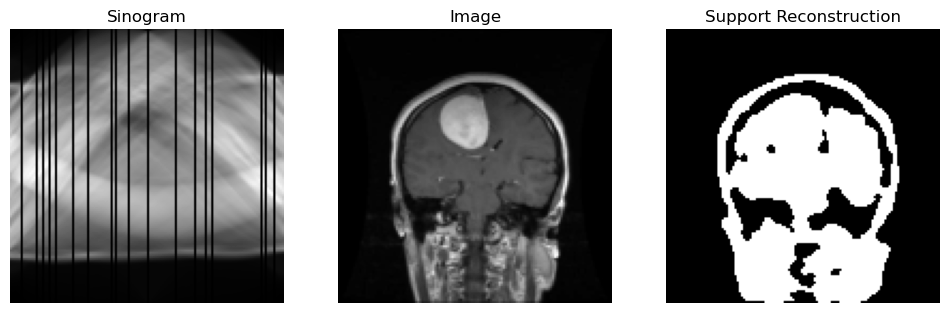

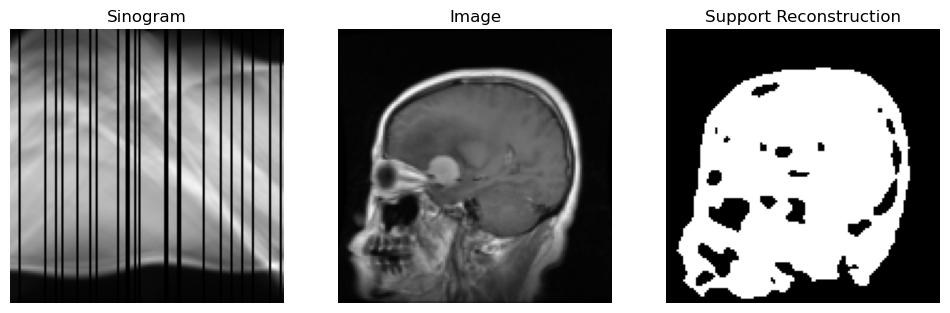

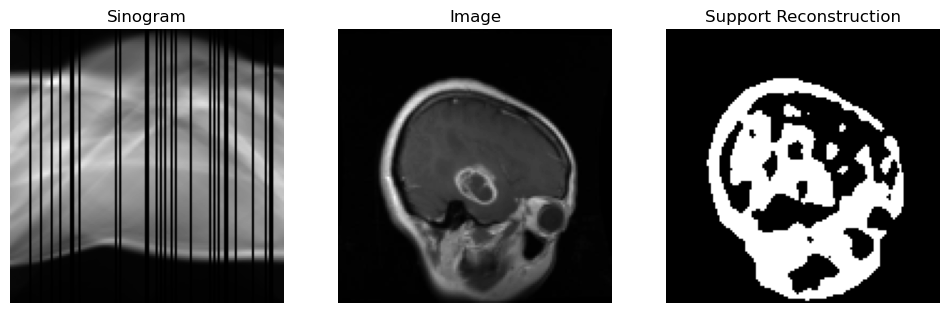

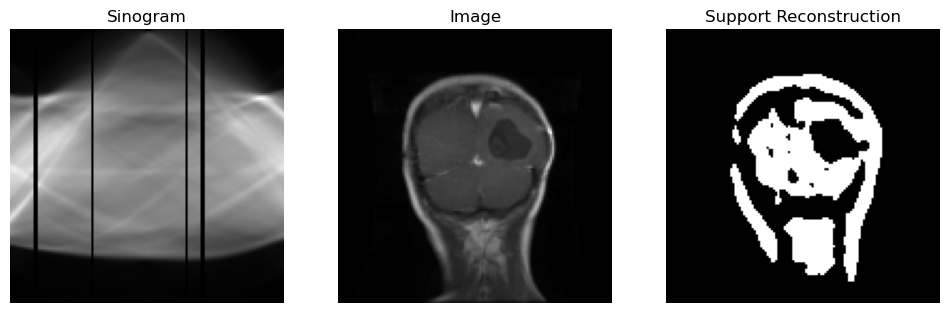

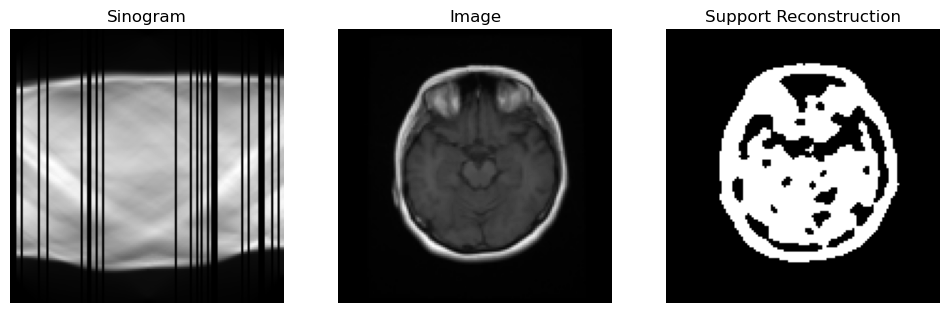

In [11]:
for i in range(4, 20):
    sin, im = torch.tensor(x_test[i]), torch.tensor(y_test[i])

    max_angles = 32

    n_angles = torch.randint(0, max_angles, (1,)).item()
    angles_idx = torch.randint(0, n, (n_angles,))
    missing_angles = torch.ones(n, n)
    missing_angles[:, angles_idx] = 0

    sin *= missing_angles
    
    with torch.no_grad():
        im_pred = automap(sin.reshape(1, n, n))
        im_pred = im_pred.reshape(n, n)
        im_pred = im_pred - im_pred.mean()

    fig, ax = plt.subplots(1, 3, figsize=(12, 4))

    ax[0].imshow(sin.reshape(n, n), 'gray')
    ax[0].axis('off')
    ax[0].set_title('Sinogram')

    ax[1].imshow(im.reshape(n, n), 'gray')
    ax[1].axis('off')
    ax[1].set_title('Image')

    ax[2].imshow(im_pred.reshape(n, n) > 0, 'gray')
    ax[2].axis('off')
    ax[2].set_title('Support Reconstruction')

    plt.show()